# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [23]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [80]:
import os
import re
import emoji

import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vannesasalazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
sw = stopwords.words("english")

In [62]:
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
import pandas as pd
import emoji
import regex as re



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vannesasalazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
twitter_folder = "/Users/vannesasalazar/Desktop/ADS 509/M1 Results/twitter/"
lyrics_folder = "/Users/vannesasalazar/Desktop/ADS 509/M1 Results/lyrics/" 

cher_lyrics = "cher"
robyn_lyrics = "robyn"


In [28]:
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens, 
    number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
    and num_tokens most common tokens. Return a list with the number of tokens, number
    of unique tokens, lexical diversity, number of characters, and num_tokens most common tokens.
    """
    
    # Calculate the # of tokens
    num_tokens_total = len(tokens)
    
    # Calculate the # of unique tokens
    num_unique_tokens = len(set(tokens))
    
    # Calculate the total # of characters in all tokens
    num_characters = sum(len(token) for token in tokens)
    
    # Calculate lexical diversity
    if num_tokens_total > 0:
        lexical_diversity = num_unique_tokens / num_tokens_total
    else:
        lexical_diversity = 0.0
    
    # Count token frequencies
    token_counts = Counter(tokens)
    
    # Get the top num_tokens most common tokens
    top_tokens = token_counts.most_common(num_tokens)
    
    if verbose:
        print(f"There are {num_tokens_total} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print("Top {} most common tokens:".format(num_tokens))
        for token, count in top_tokens:
            print(f"{token}: {count}")
   
    return [num_tokens_total, num_unique_tokens, lexical_diversity, num_characters, top_tokens]


In [29]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
Top 5 most common tokens:
text: 3
here: 2
example: 2
is: 1
some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertions are beneficial because they serve as a validation of the code itself. The assert keyword allows for us to test the condition and if it is not true the program raises an error. Like I mentioned before it helps as a form of validation ensuring the code functions as it should. By including the assert keyword we are determining if the remainder of our code will work and if not we can take the steps to correct, prior to establishing more code. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [30]:
file_path = "/Users/vannesasalazar/Desktop/ADS 509/M1 Results/twitter/robynkonichiwa_followers_data.txt"

#create empty lists pertaining to what columns should be included.
screen_name = []
name = []
id = []
location = []
followers_count = []
friends_count = []
description = []

# Read in file line by line
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) == 7:
            screen_name.append(parts[0])
            name.append(parts[1])
            id.append(parts[2])
            location.append(parts[3])
            followers_count.append(parts[4])
            friends_count.append(parts[5])
            description.append(parts[6])

# Create a DataFrame from the lists created from the txt file.
df = pd.DataFrame({
    "screen_name": screen_name,
    "name": name,
    "id": id,
    "location": location,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "description": description
})

# Display DF to make sure the information was input correctly. 
df.head()

,screen_name,name,id,location,followers_count,friends_count,description
0,screen_name,name,id,location,followers_count,friends_count,description
1,AngelxoArts,Angelxo,1424055675030806529,"Zacatlan, Puebla, Mexico",29,535,"""I love chill"" •Facebook / Instagram / SoundCl..."
2,songsfornikola,johnny,1502717352575651840,,6,318,"books, movies, music, nature & TV shows. OG Sw..."
3,thibaud_lola,Thibaud Lola,1502407708246478852,,3,69,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
4,KyleSew2112,Kyle S 🌹🇬🇧🇺🇦,3423966821,South East London,1258,3444,This Twitter profile is full of sarcasm and ra...


In [31]:
# Remove the first row, as it is a duplicate of the column names. 
df = df.iloc[1:]

# Reset index after removing the row.
df.reset_index(drop=True, inplace=True)

df.head()



,screen_name,name,id,location,followers_count,friends_count,description
0,AngelxoArts,Angelxo,1424055675030806529,"Zacatlan, Puebla, Mexico",29,535,"""I love chill"" •Facebook / Instagram / SoundCl..."
1,songsfornikola,johnny,1502717352575651840,,6,318,"books, movies, music, nature & TV shows. OG Sw..."
2,thibaud_lola,Thibaud Lola,1502407708246478852,,3,69,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
3,KyleSew2112,Kyle S 🌹🇬🇧🇺🇦,3423966821,South East London,1258,3444,This Twitter profile is full of sarcasm and ra...
4,MusiFlo,MusiFlo,3324069364,Canada,470,1706,Flora Youssef - Blogger & Founder Posting revi...


In [32]:
# remove unnecessary columns.
column_to_keep = "description" 
df = df[[column_to_keep]]

# Create a new column for the artist, add to all instances
df["artist"] = "Robyn"

# Reset the index again
df.reset_index(drop=True, inplace=True)

print(df)

                                              description artist
0       "I love chill" •Facebook / Instagram / SoundCl...  Robyn
1       books, movies, music, nature & TV shows. OG Sw...  Robyn
2       (Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...  Robyn
3       This Twitter profile is full of sarcasm and ra...  Robyn
4       Flora Youssef - Blogger & Founder Posting revi...  Robyn
...                                                   ...    ...
190028  singer of songs, type 1 diabetic, tired $jakel...  Robyn
190029  Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...  Robyn
190030         A year to change a life is still a year ✨😌  Robyn
190031  Head of Consumer - Mango. Made in Melbourne. R...  Robyn
190032  Stand for what is right, even if you stand alone.  Robyn

[190033 rows x 2 columns]


In [33]:
# same process with other artists #cher
file_path_1 = "/Users/vannesasalazar/Desktop/ADS 509/M1 Results/twitter/cher_followers_data.txt"

screen_name = []
name = []
id = []
location = []
followers_count = []
friends_count = []
description = []


with open(file_path_1, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) == 7:
            screen_name.append(parts[0])
            name.append(parts[1])
            id.append(parts[2])
            location.append(parts[3])
            followers_count.append(parts[4])
            friends_count.append(parts[5])
            description.append(parts[6])

df_cher = pd.DataFrame({
    "screen_name": screen_name,
    "name": name,
    "id": id,
    "location": location,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "description": description
})

df_cher.head()

,screen_name,name,id,location,followers_count,friends_count,description
0,screen_name,name,id,location,followers_count,friends_count,description
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,gallionjenna,J,3366479914,,752,556,csu
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...


In [34]:
# remove duplicate row.
df_cher = df_cher.iloc[1:]

# Reset the index
df_cher.reset_index(drop=True, inplace=True)

df_cher.head()

,screen_name,name,id,location,followers_count,friends_count,description
0,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
1,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
2,gallionjenna,J,3366479914,,752,556,csu
3,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...
4,Rodhandyjj,Art Vandalay 🇺🇦🇺🇦🇺🇦,1386454132022824962,"Maine, USA",104,159,I’m unemployed and live with my parents. MOOPS!


In [35]:
# remove all unnecessary columns
column_to_keep = "description"  
df_cher = df_cher[[column_to_keep]]

# Add artist column with Cher. 
df_cher["artist"] = "Cher"

# Reset the index
df_cher.reset_index(drop=True, inplace=True)

print(df_cher)

                                               description artist
0                 𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜   Cher
1                163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡   Cher
2                                                      csu   Cher
3        Writer @Washinformer @SpelmanCollege alumna #D...   Cher
4          I’m unemployed and live with my parents. MOOPS!   Cher
...                                                    ...    ...
2001085                    Social Media isn’t real life 🤟🏻   Cher
2001086  Marketing Manager by day, Photographer by nigh...   Cher
2001087  I am a housewife and I'am turning 45 in Septem...   Cher
2001088                  En IQ befriad brud från Strängnäs   Cher
2001089                      Un ente más en esta sociedad!   Cher

[2001090 rows x 2 columns]


# Read in the lyric data

In [37]:
# Lyrics from robyn
directory_path = '/Users/vannesasalazar/Desktop/ADS 509/M1 Results/lyrics/robyn'

text_file_contents = []

file_list = os.listdir(directory_path)

for file_name in file_list:
    if file_name.endswith('.txt'):
        file_path = os.path.join(directory_path, file_name)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            text_file_contents.append(file_content)

df_lyrics_robyn = pd.DataFrame({'File_Content': text_file_contents})

print(df_lyrics_robyn)

                                          File_Content
0    "Include Me Out"\n\n\n\nIt is really very simp...
1    "Electric"\n\n\n\nElectric...\n\nIt's electric...
2    "Beach 2K20"\n\n\n\n(So you wanna go out?\nHow...
3    "Love Kills"\n\n\n\nIf you're looking for love...
4    "Time Machine"\n\n\n\nHey, what did I do?\nCan...
..                                                 ...
99   "Do You Really Want Me (Show Respect)"\n\n\n\n...
100  "The Last Time"\n\n\n\nEver since I was a litt...
101  "Missing U"\n\n\n\nBaby, it's so weird to me n...
102  "Breakdown Intermission"\n\n\n\nHey my friend ...
103  "Play"\n\n\n\nUm'Um'\nSome people live their l...

[104 rows x 1 columns]


In [38]:
df_lyrics_robyn = pd.DataFrame(df_lyrics_robyn)

df_lyrics_robyn[['Title', 'Text']] = df_lyrics_robyn['File_Content'].str.split('\n\n', 1, expand=True)

df_lyrics_robyn['Title'] = df_lyrics_robyn['Title'].str.strip('"')

df_lyrics_robyn = df_lyrics_robyn.drop(df_lyrics_robyn.columns[0], axis=1)


df_lyrics_robyn["artist"] = "Robyn"

print(df_lyrics_robyn)

                                    Title  \
0                          Include Me Out   
1                                Electric   
2                              Beach 2K20   
3                              Love Kills   
4                            Time Machine   
..                                    ...   
99   Do You Really Want Me (Show Respect)   
100                         The Last Time   
101                             Missing U   
102                Breakdown Intermission   
103                                  Play   

                                                  Text artist  
0    \n\nIt is really very simple\nJust a single pu...  Robyn  
1    \n\nElectric...\n\nIt's electric\nIt's a natur...  Robyn  
2    \n\n(So you wanna go out?\nHow you gonna get t...  Robyn  
3    \n\nIf you're looking for love\nGet a heart ma...  Robyn  
4    \n\nHey, what did I do?\nCan't believe the fit...  Robyn  
..                                                 ...    ...  
99   \n\nBo

In [39]:
directory_path = '/Users/vannesasalazar/Desktop/ADS 509/M1 Results/lyrics/cher'

text_file_contents = []

file_list = os.listdir(directory_path)


for file_name in file_list:
    if file_name.endswith('.txt'):
        file_path = os.path.join(directory_path, file_name)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            text_file_contents.append(file_content)

df_lyrics_cher = pd.DataFrame({'File_Content': text_file_contents})

print(df_lyrics_cher)

                                          File_Content
0    "Come And Stay With Me"\n\n\n\nI'll send away ...
1    "Pirate"\n\n\n\nHe'll sail on with the summer ...
2    "Stars"\n\n\n\nI was never one for saying what...
3    "These Days"\n\n\n\nWell I've been out walking...
4    "Love So High"\n\n\n\nEvery morning I would wa...
..                                                 ...
311  "Take It From The Boys"\n\n\n\nSo scared I nev...
312  "Dream Baby"\n\n\n\nI found the boy for me\nHe...
313  "Please Don't Tell Me"\n\n\n\nYa shook the ove...
314  "I Hope You Find It"\n\n\n\nThese clouds aren'...
315  "Classified 1A"\n\n\n\nI know now how much I l...

[316 rows x 1 columns]


In [40]:
df_lyrics_cher = pd.DataFrame(df_lyrics_cher)


df_lyrics_cher[['Title', 'Text']] = df_lyrics_cher['File_Content'].str.split('\n\n', 1, expand=True)

df_lyrics_cher['Title'] = df_lyrics_cher['Title'].str.strip('"')

df_lyrics_cher = df_lyrics_cher.drop(df_lyrics_cher.columns[0], axis=1)

df_lyrics_cher["artist"] = "Cher"

print(df_lyrics_cher)

                     Title                                               Text  \
0    Come And Stay With Me  \n\nI'll send away all my false pride\nAnd I'l...   
1                   Pirate  \n\nHe'll sail on with the summer wind\nThat b...   
2                    Stars  \n\nI was never one for saying what I really f...   
3               These Days  \n\nWell I've been out walking \nAnd I don't d...   
4             Love So High  \n\nEvery morning I would wake up\nAnd I'd tie...   
..                     ...                                                ...   
311  Take It From The Boys  \n\nSo scared I never been\nToo hard to keep i...   
312             Dream Baby  \n\nI found the boy for me\nHe's my dream baby...   
313   Please Don't Tell Me  \n\nYa shook the override \nWhy'd I get this f...   
314     I Hope You Find It  \n\nThese clouds aren't going nowhere, darling...   
315          Classified 1A  \n\nI know now how much I love you\nI knew it ...   

    artist  
0     Cher  
1

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [43]:
punctuation = set(punctuation)

In [82]:
def preprocess_text_combined(text):
    
    characters_to_remove = string.punctuation + "•øØ"
    
    text = re.sub(r'\s+', ' ', text)
    
    words = word_tokenize(text)
    
    words = [word.lower() for word in words]
    
    words = [''.join(filter(lambda char: char not in characters_to_remove, word)) for word in words]
    
    words = [word for word in words if word not in stopwords.words('english') and word.strip() != '']
    
    return words


In [83]:
df['preprocessed_text'] = df['description'].apply(preprocess_text_combined)

In [68]:
#df_cher['preprocessed_text'] = df_cher['description'].apply(preprocess_text_combined)
# I wanted to also conduct the process of cleaning and preparing data for analysis but their is over 2 million rows
# I was not able to process it without taking a significant amount of time and processing power. 

In [84]:
df_lyrics_cher['preprocessed_text'] = df_lyrics_cher['Text'].apply(preprocess_text_combined)

In [85]:
df_lyrics_robyn['preprocessed_text'] = df_lyrics_robyn['Text'].apply(preprocess_text_combined)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [86]:
all_tokens_robyn = [token for tokens_list in df_lyrics_robyn['preprocessed_text'] for token in tokens_list]

lyrics_robyn_result = descriptive_stats(all_tokens_robyn)

There are 14560 tokens in the data.
There are 2083 unique tokens in the data.
There are 68781 characters in the data.
The lexical diversity is 0.143 in the data.
Top 5 most common tokens:
nt: 515
know: 305
got: 274
love: 270
like: 230


In [87]:
all_tokens_cher = [token for tokens_list in df_lyrics_cher['preprocessed_text'] for token in tokens_list]

lyrics_cher_result = descriptive_stats(all_tokens_cher)
                                      


There are 34122 tokens in the data.
There are 3578 unique tokens in the data.
There are 159898 characters in the data.
The lexical diversity is 0.105 in the data.
Top 5 most common tokens:
nt: 1011
love: 984
know: 480
na: 350
got: 347


In [88]:
all_tokens = [token for tokens_list in df['preprocessed_text'] for token in tokens_list]

tweet_result = descriptive_stats(all_tokens)


There are 1516374 tokens in the data.
There are 242423 unique tokens in the data.
There are 9052367 characters in the data.
The lexical diversity is 0.160 in the data.
Top 5 most common tokens:
music: 15503
love: 11965
https: 7974
och: 7929
life: 7723


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: I think nt might have been not? Not is one of the stop words, so possibly would have been the most common in lyrics. I definitely think I would not have seen love, or life, or music, got, know. It probably would have been top 5 all stop words. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I am not suprised that the lexical diversity is low, just because songs and social media related to artists is meant to be fun and catchy. I dont think large, difficult, or not used in everyday language would make good songs, or be used on social media for the most part. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 

In [89]:
def extract_emojis(text):
    emoji_list = []
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F700-\U0001F77F"  
                           u"\U0001F780-\U0001F7FF"  
                           u"\U0001F800-\U0001F8FF"  
                           u"\U0001F900-\U0001F9FF"  
                           u"\U0001FA00-\U0001FA6F"  
                           u"\U0001FA70-\U0001FAFF"  
                           u"\U0001FB00-\U0001FBFF"  
                           u"\U0001F004-\U0001F0CF"  
                           "]+", flags=re.UNICODE)
    emoji_list = emoji_pattern.findall(text)
    return emoji_list

In [90]:
all_emojis = df['description'].apply(extract_emojis).explode().tolist()

In [91]:
emoji_counts = Counter(all_emojis)

In [92]:
top_10_emojis = emoji_counts.most_common(10)

print(top_10_emojis)

[(nan, 170320), ('🌈', 3643), ('🏳', 3048), ('🎶', 425), ('🏴', 359), ('💜', 355), ('💙', 330), ('💻', 329), ('🖤', 326), ('📍', 302)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [93]:
def extract_hashtags(text):
    hashtag_list = re.findall(r'#\w+', text)
    return hashtag_list

In [94]:
all_hashtags = df['description'].apply(extract_hashtags).explode().tolist()

In [95]:
hashtag_counts = Counter(all_hashtags)

In [96]:
top_10_hashtags = hashtag_counts.most_common(10)
print(top_10_hashtags)

[(nan, 176984), ('#BlackLivesMatter', 337), ('#BLM', 306), ('#blacklivesmatter', 208), ('#1', 199), ('#music', 174), ('#Music', 113), ('#EDM', 86), ('#LGBTQ', 75), ('#TeamFollowBack', 59)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [97]:
df_lyrics_cher['preprocessed_Title'] = df_lyrics_cher['Title'].apply(preprocess_text_combined)

In [98]:
df_lyrics_robyn['preprocessed_Title'] = df_lyrics_robyn['Title'].apply(preprocess_text_combined)

In [99]:
all_tokens_titles_cher = [token for sublist in df_lyrics_cher['preprocessed_Title'] for token in sublist]


word_counts_cher = Counter(all_tokens_titles_cher)

top_5_words_cher = word_counts_cher.most_common(5)

print(top_5_words_cher)

[('love', 38), ('nt', 19), ('man', 15), ('song', 11), ('come', 7)]


In [100]:
all_tokens_titles_robyn = [token for sublist in df_lyrics_robyn['preprocessed_Title'] for token in sublist]


word_counts_robyn = Counter(all_tokens_titles_robyn)

top_5_words_robyn = word_counts_robyn.most_common(5)

print(top_5_words_robyn)

[('love', 6), ('nt', 5), ('u', 4), ('hang', 3), ('tell', 3)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


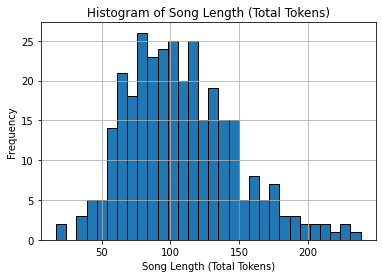

In [101]:
#CHER
plt.hist([len(tokens_list) for tokens_list in df_lyrics_cher['preprocessed_text']], bins=30, edgecolor='k')
plt.xlabel('Song Length (Total Tokens)')
plt.ylabel('Frequency')
plt.title('Histogram of Song Length (Total Tokens)')
plt.grid(True)

# Show the histogram
plt.show()

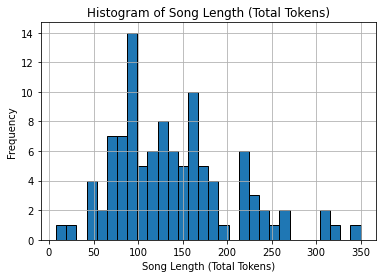

In [102]:
#Robyn
plt.hist([len(tokens_list) for tokens_list in df_lyrics_robyn['preprocessed_text']], bins=30, edgecolor='k')
plt.xlabel('Song Length (Total Tokens)')
plt.ylabel('Frequency')
plt.title('Histogram of Song Length (Total Tokens)')
plt.grid(True)

# Show the histogram
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches one or more whitespace characters in a text. The \s is whitespace, and the + means the preceding element should occur consecutively once or more times. 
